# Linear Regression

## Correlation vs Simple Linear Regression

* A correlation analysis provides information on the strength and direction of the linear relationship between two variables, while a simple linear regression analysis estimates parameters in a linear equation that can be used to predict values of one variable based on the other.
* If x and y have the same standard deviation then r equals slope

## The Dependent Variable

* Linear Regression: y is continuous, numerical
* Linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). https://en.wikipedia.org/wiki/Linear_regression
* Scalar, a physical quantity that is completely described by its magnitude; examples of scalars are volume, density, speed, energy, mass, and time. Other quantities, such as force and velocity, have both magnitude and direction and are called vectors. https://www.britannica.com/science/scalar

# Simple Linear Regression

In statistics, linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variable (also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression. This term is distinct from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable.

https://en.wikipedia.org/wiki/Linear_regression

## $y = mx + b$

* $m = \frac{N * \sum{(xy)} - \sum{x}\sum{y}}{N * \sum{x^2} - (\sum{x})^2}$
* $b = \frac{\sum{y} - m * \sum{x}}{N}$

In [ ]:
# https://www.mathsisfun.com/data/least-squares-regression.html
import numpy as np
import pandas as pd

def xy(r):
    return r.x * r.y

x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 3, 2, 3, 5])
N = len(x)

m_table = pd.DataFrame({'x': x, 'y': y})
m_table['x^2'] = m_table['x'].apply(lambda x: x**2)
m_table['xy'] = m_table.apply(xy, axis=1)
print(m_table.to_string(index=False))
print(f'means: {np.mean(x)}, {np.mean(y)}')

print('N:', N)
sums = list(m_table.sum())
print('sums:', sums)
m = (N * sums[3] - sums[0] * sums[1]) / (N * sums[2] - sums[0]**2)
print('m:', m)
b = (sums[1]-m*sums[0])/N
print('b:', b)

 x  y  x^2  xy
 1  1    1   1
 2  3    4   6
 3  2    9   6
 4  3   16  12
 5  5   25  25
means: 3.0, 2.8
N: 5
sums: [15, 14, 55, 50]
m: 0.8
b: 0.4


* $m = \frac{N * \sum{(xy)} - \sum{x}\sum{y}}{N * \sum{x^2} - (\sum{x})^2}$
* m = (5 * 50 - (15 * 14))/(5 * 55 - 15^2) = (250 - 210)/(275 - 225) = 40/50 = .8
* $b = \frac{\sum{y} - m * \sum{x}}{N}$
* (14 - .8 * 15)/5 = 2/5 = .4

### Why Delete Constants?

What is the slope from y = mx + b when a variable is constant?

## Another Formula

* $y_i = \alpha + \beta x_i + \epsilon_i$
* $y = \alpha + \beta x$
* $\hat{\alpha} = \bar{y} - (\hat{\beta}\bar{x})$
* $\hat{\beta} = \frac{\sum^N_{i=1}(x_i - \bar{x})(y_i - \bar{y})}{\sum^N_{i=1}(x_i - \bar{x})^2}$
* $ = \frac{s_{xy}}{s^2_x}$
* $ = r_{xy}\frac{s_y}{s_x}$
* $ r_{xy} = \frac{cov(x,y)}{\sigma_x\sigma_y} = \frac{\frac{1}{N}\sum(x-\bar{x})(y-\bar{y})}{\sqrt\frac{\sum(x-\bar{x})^2}{N}\sqrt\frac{\sum(y-\bar{y})^2}{N}}  = \frac{\sum(x-\bar{x})(y-\bar{y})}{\sqrt{\sum(x-\bar{x})^2}\sqrt{\sum(y-\bar{y})^2}}$

where

* $\bar{x}$ and $\bar{y}$ as the average of $x_i$ and $y_i$, respectively
* $r_{xy}$ is the **sample correlation coefficient** between x and y
* $s_x$ and $s_y$ are the **sample standard deviations** of x and y
* $s_{x}^2$ and $s_{x,y}$ is the **sample variance** and **sample covariance**, respectively

The goal is to find estimated values $\hat{\alpha}$ and $\hat{\beta}$ for the parameters $\alpha$ and $\beta$ which would provide the best fit in some sense for the data points.

The parameters for linear regression are $\alpha$ and $\beta$ and $e$. The error term, $e$, represents the rest of $y$ that $X$ cannot explain. If we look at $y = f(X) + e$ and assume that the function of $e$ is iid, then the sum of $e$ will be zero and is usually left off of the equation.

The sum of the residuals always equals zero (assuming that your line is actually the line of 'best fit...' The mean of residuals is also equal to zero, as the mean = the sum of the residuals / the number of items. The sum is zero, so 0/n will always equal zero.

Stephanie Glen. "Residual Values (Residuals) in Regression Analysis" From StatisticsHowTo.com: Elementary Statistics for the rest of us! https://www.statisticshowto.com/residual/

**Sample Correlation Coefficient**: In statistics, correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data. Although in the broadest sense, "correlation" may indicate any type of association, in statistics it normally refers to the degree to which a pair of variables are linearly related. The sample correlation coefficient can be used to estimate the population Pearson correlation

https://en.wikipedia.org/wiki/Correlation#Sample_correlation_coefficient

The sample correlation coefficient is a biased estimator of the population correlation, but in practice researchers rarely recognize the bias and attempt to correct for it

https://www.uv.es/revispsi/articulos1.03/9.ZUMBO.pdf

**Uncorrected Sample Standard Deviation**: In statistics, the standard deviation is a measure of the amount of variation or dispersion of a set of values. A low standard deviation indicates that the values tend to be close to the mean (also called the expected value) of the set, while a high standard deviation indicates that the values are spread out over a wider range. The formula for the population standard deviation (of a finite population) can be applied to the sample, using the size of the sample as the size of the population (though the actual population size from which the sample is drawn may be much larger). This estimator, denoted by sN, is known as the uncorrected sample standard deviation, or sometimes the standard deviation of the sample (considered as the entire population), and is defined as follows:

$s_N = \sqrt{\frac{1}{N}\sum{(x-\bar{x})^2}}$

https://en.wikipedia.org/wiki/Standard_deviation#Uncorrected_sample_standard_deviation

Uncorrected sample standard deviations are biased estimates of population standard deviations.

https://blogs.uoregon.edu/rclub/2015/01/20/biased-and-unbiased-estimates/

### Biased

**Standard Deviation of the Population**: $\sigma = \sqrt{\frac{1}{N}\sum(x-\bar{x})^2}$

**Uncorrected Sample Standard Deviation**: $sN = \sqrt{\frac{1}{N}\sum(x-\bar{x})^2}$

### Unbiased

**Standard Deviation of the Sample**: $s = \sqrt{\frac{1}{n-1}\sum(x-\bar{x})^2}$

### Bessel's Correction

According to Wikipedia (2022):

In statistics, Bessel's correction is the use of n − 1 instead of n in the formula for the sample variance and sample standard deviation, where n is the number of observations in a sample. This method corrects the bias in the estimation of the population variance. It also partially corrects the bias in the estimation of the population standard deviation. However, the correction often increases the mean squared error in these estimations. This technique is named after Friedrich Bessel (para 1).

Bessel's correction. (June 13, 2022). In *Wikipedia*. https://en.wikipedia.org/wiki/Bessel%27s_correction

* What is bias? https://stats.libretexts.org/Bookshelves/Applied_Statistics/Book%3A_Answering_Questions_with_Data_-__Introductory_Statistics_for_Psychology_Students_(Crump)/04%3A_Probability_Sampling_and_Estimation/4.13%3A_Estimating_population_parameters
* What are degrees of freedom? https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/degrees-of-freedom/

**SEE BESSEL'S CORRECTION**

## Line of Best Fit

Line of best fit refers to a line through a scatter plot of data points that best expresses the relationship between those points. Statisticians typically use the least squares method (sometimes known as ordinary least squares, or OLS) to arrive at the geometric equation for the line, either through manual calculations or by using software.

* https://www.investopedia.com/terms/l/line-of-best-fit.asp
* https://www.quora.com/Whats-the-difference-between-the-regression-line-and-the-line-of-best-fit


## Residuals

When you perform simple linear regression (or any other type of regression analysis), you get a line of best fit. The data points usually don’t fall exactly on this regression equation line; they are scattered around. A residual is the vertical distance between a data point and the regression line. Each data point has one residual.

* https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/residual/
* https://www.statology.org/residual-sum-of-squares-in-excel/

### MSE

* MSE, $f(x) = x^2$, works well with residuals
* MSE = $\frac{1}{N} \sum{(y-\hat{y})^2}$

**SEE PLOTLY RESIDUALS**

## Linear Regression with Scikit-learn

Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

https://en.wikipedia.org/wiki/Scikit-learn

As mentioned, Scikit-learn provides us with a linear regression model that we can use as demonstrated in the next cell.

In [ ]:
# using sklearn
from sklearn.linear_model import LinearRegression

x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 3, 2, 3, 5])
x = x.reshape(-1, 1)

model = LinearRegression()
model.fit(x, y)
print(f'y = {model.intercept_:.2} + {model.coef_[0]:.2}(X)')

y = 0.4 + 0.8(X)


### Assumptions

* There is a linear regression relation between Y and X
* The error terms (residuals) are normally distributed
* The variance of the error terms is constant over all X values (homoscedasticity)
* The error terms are independent
* **ASSUMPTIONS**

## Multiple Linear Regression

https://www.investopedia.com/terms/m/mlr.asp

$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 ... + \beta_n x_n + \epsilon$

where:
* y = dependent variable
* x = explanatory  variable
* $\beta_0$ = intercept
* $\beta_n$ = slope coefficients
* $\epsilon$ = the model's error term

### Assumptions of Linear Regression

* Linearity: There is a linear relationship between the independent variable and the dependent variable
* No Multicollinearity: Features should not be highly correlated
* Normality: The residuals are normally distributed
* Homoscedasticity: The residuals have an even distribution around the mean and across the spread
* Independence: There is no correlation between residuals; there is no trend, no pattern, no structure in residuals
* Time series may violate independence
* Elements that are randomly assigned to features may violate independence
* All relevant explanatory variables must be used
* Features cannot be correlated with error term

Become familiar with the plots provided in the following links:
* https://www.analyticsvidhya.com/blog/2016/07/deeper-regression-analysis-assumptions-plots-solutions/
* https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions.html

In [ ]:
# get the data
import pandas as pd

advertising = pd.read_csv('https://raw.githubusercontent.com/gitmystuff/INFO4050/main/Datasets/Advertising.csv', usecols=['TV', 'radio', 'newspaper', 'sales'])
advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    advertising.drop('sales', axis=1),
    advertising['sales'],
    test_size=0.25,
    random_state=42)

In [ ]:
# create and train the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

# test set prediction results
yhat = model.predict(X_test)
print(f'MSE: {mean_squared_error(y_true=y_test, y_pred=yhat)}')
print(f'R-Squared: {r2_score(y_test, yhat)}')

MSE: 2.880023730094192
R-Squared: 0.8935163320163658


## Confidence Intervals

* *Confidence intervals* and *hypothesis testing* are closely related: for two-sided tests, a parameter value is rejected at significance level α exactly when it lies outside the (1−α) confidence interval. However, confidence intervals focus on estimating a range of plausible parameter values, while hypothesis tests focus on evaluating specific claims about the parameter.
* In a normal model, a 95% confidence interval is roughly estimate ± 2 standard errors; it’s an interval that, under repeated sampling, would contain the true parameter about 95% of the time.
* Seaborn: Size of the confidence interval for the regression estimate. This will be drawn using translucent bands around the regression line. The confidence interval is estimated using a bootstrap; for large datasets, it may be advisable to avoid that computation by setting this parameter to None
* Wikipedia: The confidence interval represents values for the population parameter for which the difference between the parameter and the observed estimate is not statistically significant at the 10% level
* Confidence intervals are about parameters not samples; e.g. the majority of the points in the OP's image are not within the shaded area (also seaborn uses 95% CIs by default). A better intuition in this example is that the data is consistent with any slope that passes through the CI. The reason it expands at the ends is because the data gives "less information" there – Sam Mason  Jun 3, 2020 at 14:02
* https://stackoverflow.com/questions/62167783/what-does-the-background-area-mean-in-seaborn-regression-plot

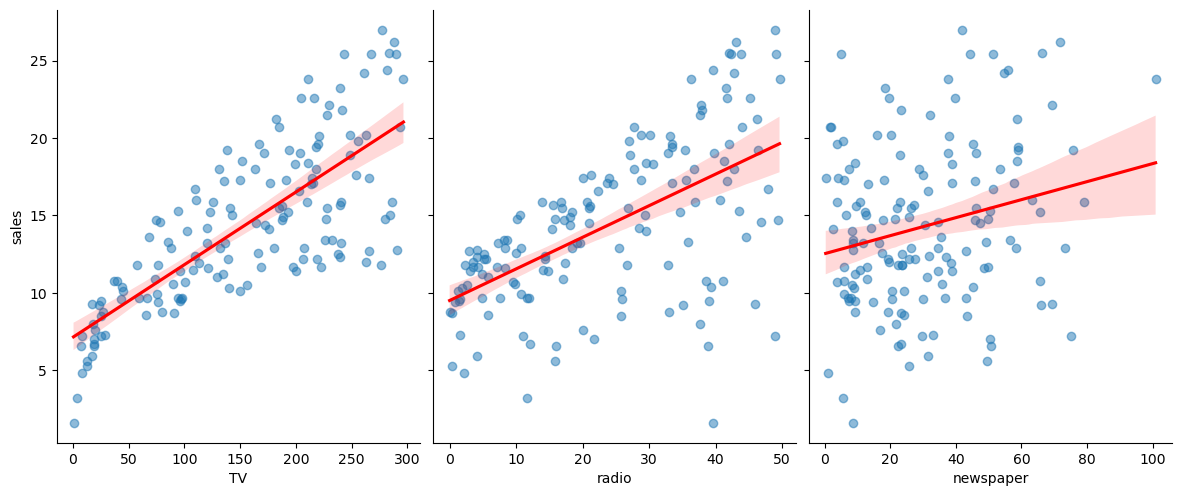

In [ ]:
# scatter plots showing correlation
# https://seaborn.pydata.org/tutorial/regression.html
import pandas as pd
import seaborn as sns

sns.pairplot(data=pd.concat([X_train, y_train], axis=1), x_vars=advertising[['TV', 'radio', 'newspaper']].columns, y_vars='sales',
             kind='reg',
             height=5,
             aspect=0.8,
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}});

The shaded red areas represent our 95% confidence intervals.

* Confidence intervals tend to be wider the more variability in a distribution
* Confidence intervals tend to be narrower the larger the sample size is
* Confidence intervals tend to be narrower when our accuracy is higher

Looking at the scatterplots, which of the features have linear characteristics? Which of the lines of best fit are closer to being parallel to the x axis?

## Types of Regression

* Simple Linear Regression
* Multiple Linear Regression
* Polynomial Regression
* Support Vector Regression
* Decision Tree Regression
* Random Forest Regression

**SEE MORE REGRESSION**

### Fixed Effect Regression and Causal Inference

* https://towardsdatascience.com/fixed-effect-regression-simply-explained-ab690bd885cf